In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import os

# to disable all debugging logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#importing data set
dir =os.listdir('/content/drive/MyDrive/SoftCom Lab/PlantVillage_2')
for filenames in dir:
    print(filenames)

Potato___Early_blight
Potato___Late_blight
Potato___healthy


In [26]:
Current_Dir = os.getcwd()
dataset_dir = pathlib.Path(Current_Dir)
print(dataset_dir)

/content


In [27]:
#Global Initialization Of some important variables

Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs = 50

In [28]:
 # yields batches of images from the subdirectories class_a , class_b and class_c 
# # # together with labels 0 , 1 and 2 (0, 1, 2 corresponding to classes class_a , class_b and class_c respectively )

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/SoftCom Lab/PlantVillage_2", batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True) 

Found 2152 files belonging to 3 classes.


In [29]:
##folder(Classes) in data set directory

class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [30]:
len(dataset) # Number of Batches = (total number of files belonging to all classes / Batch_Size)

68

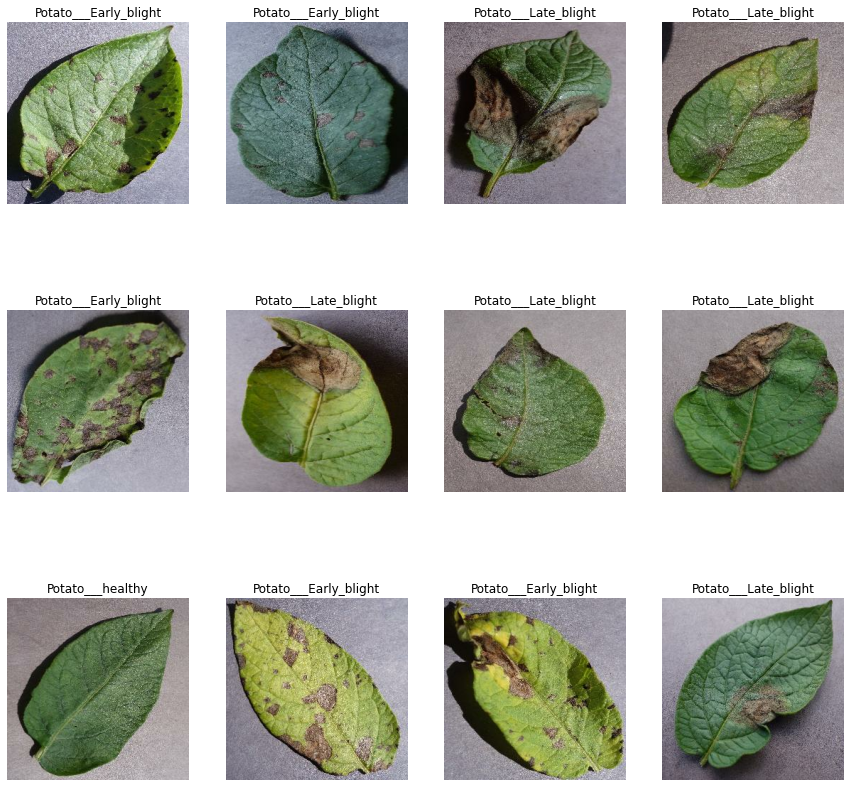

In [31]:
# Plotting the image
plt.figure(figsize = (15,15))
# dataset.take(count) : Creates a Dataset with at most 'count' elements(batch) from the dataset
for image, label in dataset.take(1): 
    for i in range(12):
        plt.subplot(3, 4, i+1) # many plots at a time =>subpots
        plt.imshow(image[i].numpy().astype('uint8')) #converting all data of image into numpy and than to intiger type as they were in float.
        plt.title(class_name[label[i]])  # title of the class_name of image
        plt.axis("off") # Hide the values of graph
        

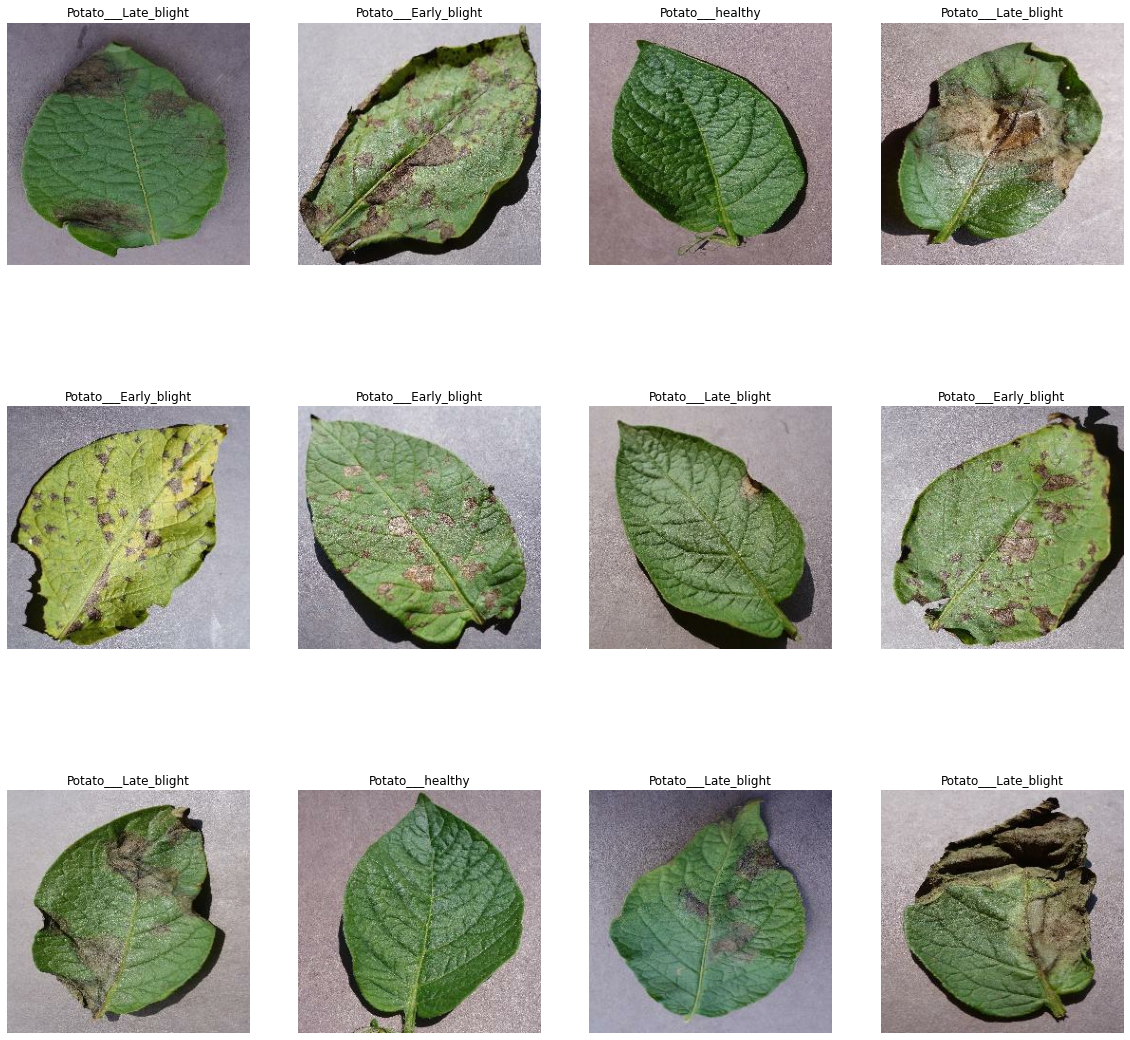

In [32]:
# PLotting Image
plt.figure(figsize = (20,20))

#dataset.take(Count): Creates a dataset with at most 'count' elements(batch) from dataset

for image, label in dataset.take(1):
    for i in range (12):
        plt.subplot(3, 4, i+1) # many plot at a time  ==> subplot
        #converting all data of image into numpy and than to intiger type as they were in float.
        plt.imshow(image[i].numpy().astype('uint8'))
  
        # title of the class_name of image
        plt.title(class_name[label[i]])
        
        # Hide the values of graph
        plt.axis('off')
        

# Splitting Dataset

In [33]:
# Function for Splitting the data

def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
        
    ds_size = len(ds)
    train_size =int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [34]:
train_data, val_data, test_data = split_dataset(dataset)

In [35]:
print("Size of Data is: {0} \nBatch size of Training Data is:{1}\nBatch size of Val data is:{2}\nBatch size of Test Dast Is:{3} " .format(len(dataset), len(train_data), len(val_data), len(test_data)))

Size of Data is: 68 
Batch size of Training Data is:54
Batch size of Val data is:6
Batch size of Test Dast Is:8 


In [36]:
# caching,shuffle and prefetching the data

train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_da = val_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Data Pre-processing 

In [37]:
# Image Preprocessing : Rescaling and Resizing

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [38]:
# Data augmentation by flipping and rotating existing images

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.2)
])

# Model Building

In [39]:
# Creating Convolution Layers

input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'softmax'),

])


model.build(input_shape = input_shape)

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [41]:
# Optimizing the model 'SparseCategoricalCrossentropy'=>as there are many categorical classes of data
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'])

In [ ]:
#Fit the model with training data and also pass validation data
history = model.fit(
  train_data,
  epochs = Epochs,
  batch_size = Batch_Size, 
  verbose = 1,
  validation_data = val_data)


Epoch 1/50
54/54 [==============================] - 199s 4s/step - loss: 1.3695 - accuracy: 0.4619 - val_loss: 0.9005 - val_accuracy: 0.6198
Epoch 2/50
33/54 [=================>............] - ETA: 1:07 - loss: 0.8240 - accuracy: 0.6114

In [ ]:
scores = model.evaluate(train_data)

# Analyzing the Output

In [ ]:
# Getting the model history to analyse

train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [ ]:
#graphs for accuracy and loss of training and validation data

plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
plt.plot(range(Epochs), train_acc, label = 'Training Accuracy')
plt.plot(range(Epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,3,2)
plt.plot(range(Epochs), train_loss, label = 'Training_Loss')
plt.plot(range(Epochs), val_loss, label = 'Validation_Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [ ]:
#plotting image
for batch_image, batch_label in train_data.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]
    
    print('First Image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)
    
    batch_prediction = model.predict(batch_image)
    print('Predicted label : ', class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')

In [ ]:
# plotting batch of images with its actual label, predicted label and confidence
plt.figure(figsize = (15,15))
for batch_image, batch_label in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_name[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_name[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')